### Topik 1. Kepatuhan Perusahaan terhadap Pajak Karbon
#### Tujuan : Melakukan pengecekan apakah emisi perusahaan dari sample data melebihi batas pajak karbon (50 ton CO2)
#### Konsep : if-else, dictionary, library pandas untuk membaca data csv, library matplotlib untuk visualisasi ke dalam chart
#### Output : Status pajak karbon dan distribusi emisi untuk setiap perusahaan

PT_Textilindo kena pajak karbon Rp. 250,000.0
PT_Semindo bebas pajak karbon
PT_EnergiJaya kena pajak karbon Rp. 564,000.0
PT_Pulpindo kena pajak karbon Rp. 100,000.0
PT_AgroMakmur bebas pajak karbon
PT_BajaSentosa kena pajak karbon Rp. 374,000.00000000006
PT_KimiaFarindo bebas pajak karbon
PT_MiningCo kena pajak karbon Rp. 648,000.0000000001
PT_PetroJaya kena pajak karbon Rp. 217,999.99999999997
PT_SinarLogam kena pajak karbon Rp. 72,000.00000000003
PT_IndoPlastik bebas pajak karbon
PT_BumiEnergi kena pajak karbon Rp. 505,999.99999999994
PT_TextilMakmur kena pajak karbon Rp. 295,999.99999999994
PT_SemenBerkah bebas pajak karbon
PT_KertasJaya kena pajak karbon Rp. 177,999.99999999997
PT_AgroSentosa bebas pajak karbon
PT_BajaIndo kena pajak karbon Rp. 404,000.00000000006
PT_KimiaJaya bebas pajak karbon
PT_TambangMakmur kena pajak karbon Rp. 611,999.9999999999
PT_PetroMakmur kena pajak karbon Rp. 262,000.00000000003
PT_LogamBerkah kena pajak karbon Rp. 85,999.99999999994
PT_PlastikJaya be

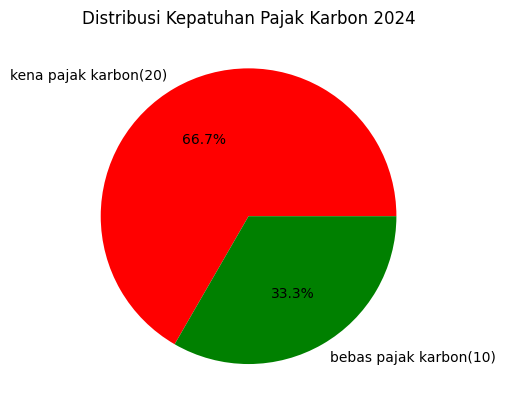

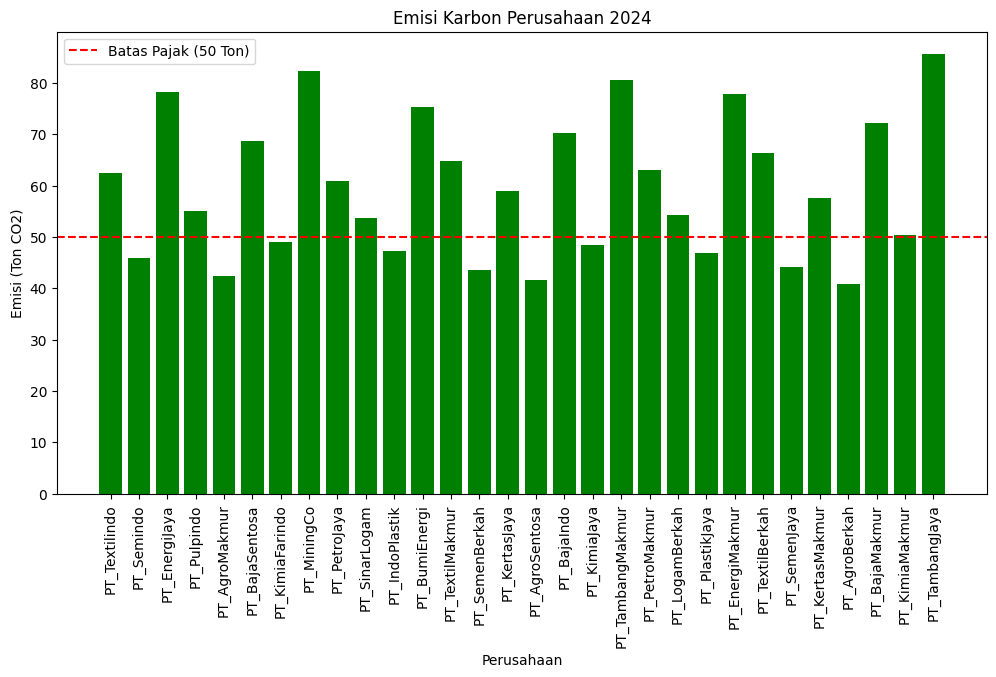

In [15]:
# import Library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt

# mendefinisikan fungsi kepatuhan pajak untuk menghitung besar pajak dan status nya
def kepatuhan_pajak(perusahaan, emisi, batas, tarif):
    if emisi > batas:
        pajak = (emisi - batas) * tarif
        status = 'kena pajak karbon'
        print(f"{perusahaan} {status} Rp. {pajak:,}")
    else:
        pajak = 0
        status = 'bebas pajak karbon'
        print(f"{perusahaan} {status}")
    return status,pajak

# mendefinisikan fungsi untuk membuat pie chart
def pie_plot_emisi(dict):
    kena_pajak = sum(1 for data in dict.values() if data['status'] =='kena pajak karbon')
    tidak_kena_pajak = len(dict) - kena_pajak

    labels = [f"kena pajak karbon({kena_pajak})", f"bebas pajak karbon({tidak_kena_pajak})"]
    sizes = [kena_pajak, tidak_kena_pajak]
    colors = ['red', 'green']

    plt.figure()
    plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%')
    plt.title('Distribusi Kepatuhan Pajak Karbon 2024')
    plt.show

# mendefinisikan fungsi untu membuat bar chart
def bar_plot_emisi(dict):
    perusahaan = list(dict.keys())
    emisi = [data['emisi'] for data in dict.values()]

    plt.figure(figsize=(12,6))
    plt.bar(perusahaan,emisi,color='green')
    plt.xlabel('Perusahaan')
    plt.ylabel('Emisi (Ton CO2)')
    plt.title('Emisi Karbon Perusahaan 2024')
    plt.axhline(y=50, color='red', linestyle='--', label='Batas Pajak (50 Ton)')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

# membaca file emisi_perusahaan.csv
df = pd.read_csv("assets/emisi_perusahaan.csv")

# menginisiasi variabel yang diperlukan yaitu batas pajak karbon 50 ton, tarif Rp 20000 per ton, dan dictionary kosong
batas = 50
tarif = 20000
pajak_dict = {}

# melakukan iterasi untuk setiap barus di dataframe, kemudian menyimpan ke dictionary
for index, row in df.iterrows():
    perusahaan = row['Nama_Perusahaan']
    emisi = row['Emisi_2024']
    status,pajak = kepatuhan_pajak(perusahaan, emisi, batas, tarif)
    pajak_dict[perusahaan] = {
        'emisi' : emisi,
        'pajak' : pajak,
        'status' : status
    }

# memanggil fungsi untuk membuat chart
pie_plot_emisi(pajak_dict)
bar_plot_emisi(pajak_dict)


### Topik 2. Deteksi Greenwashing Berdasarkan Data Emisi dan Klaim Hijau
#### Tujuan : Melakukan validasi apakah perusahaan melakukan greenwashing dari klaim hijau dan emisi yang diciptakan perusahaan tersebut
#### Konsep : if-else, dictionary, library pandas untuk membaca data csv, library matplotlib untuk visualisasi ke dalam chart
#### Output : Status greenwashing untuk setiap perusahaan

PT_Textilindo terdeteksi greenwashing dengan emisi: 62.5 ton, klaim hijau: ya.
PT_Semindo tidak terdeteksi greenwashing.
PT_EnergiJaya terdeteksi greenwashing dengan emisi: 78.2 ton, klaim hijau: ya.
PT_Pulpindo terdeteksi greenwashing dengan emisi: 55.0 ton, klaim hijau: ya.
PT_AgroMakmur tidak terdeteksi greenwashing.
PT_BajaSentosa terdeteksi greenwashing dengan emisi: 68.7 ton, klaim hijau: ya.
PT_KimiaFarindo tidak terdeteksi greenwashing.
PT_MiningCo terdeteksi greenwashing dengan emisi: 82.4 ton, klaim hijau: ya.
PT_PetroJaya tidak terdeteksi greenwashing.
PT_SinarLogam terdeteksi greenwashing dengan emisi: 53.6 ton, klaim hijau: ya.
PT_IndoPlastik tidak terdeteksi greenwashing.
PT_BumiEnergi terdeteksi greenwashing dengan emisi: 75.3 ton, klaim hijau: ya.
PT_TextilMakmur terdeteksi greenwashing dengan emisi: 64.8 ton, klaim hijau: ya.
PT_SemenBerkah tidak terdeteksi greenwashing.
PT_KertasJaya terdeteksi greenwashing dengan emisi: 58.9 ton, klaim hijau: ya.
PT_AgroSentosa tidak

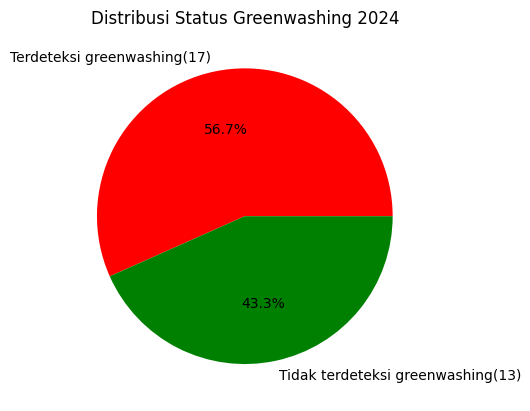

In [ ]:
# import Library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt

# mendefinisikan fungsi cek greenwashing untuk memverifikasi klaim hijau dengan emisi yang dihasilkan
def cek_greenwashing(perusahaan, emisi, klaim, batas):
    if klaim.lower() == 'ya' and emisi > batas:
        status = 'terdeteksi greenwashing'
        print(f"{perusahaan} {status} dengan emisi: {emisi} ton, klaim hijau: {klaim}.")
    else:
        status = 'tidak terdeteksi greenwashing'
        print(f"{perusahaan} {status}.")
    return status

# mendefinisikan fungsi untuk membuat pie chart
def pie_plot_greenwash(dict):
    greenwashing = sum(1 for data in dict.values() if data['status'] =='terdeteksi greenwashing')
    tidak_greenwashing = len(dict) - greenwashing

    labels = [f"Terdeteksi greenwashing({greenwashing})", f"Tidak terdeteksi greenwashing({tidak_greenwashing})"]
    sizes = [greenwashing, tidak_greenwashing]
    colors = ['red', 'green']

    plt.figure()
    plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%')
    plt.title('Distribusi Status Greenwashing 2024')
    plt.show

# membaca file emisi_perusahaan.csv
df = pd.read_csv("assets/emisi_perusahaan.csv")

# menginisiasi variabel yang diperlukan yaitu batas pajak karbon 50 ton dan dictionary kosong
batas = 50
status_dict = {}

# melakukan iterasi untuk setiap barus di dataframe, kemudian menyimpan ke dictionary
for index, row in df.iterrows():
    perusahaan = row['Nama_Perusahaan']
    emisi = row['Emisi_2024']
    klaim = row['Klaim_Hijau']
    status = cek_greenwashing(perusahaan,emisi,klaim,batas)
    status_dict[perusahaan] = {
        'emisi' : emisi,
        'klaim' : klaim,
        'status' : status
    }

# memanggil fungsi untuk membuat chart
pie_plot_greenwash(status_dict)


### Topik 3. Analisis risiko lahan untuk mengurangi konflik sosial
#### Tujuan : Melakukan analisa proyek PLTS mana saja yang memiliki risiko terjadi konflik lahan
#### Konsep : if-else, dictionary, library pandas untuk membaca data csv, library matplotlib untuk visualisasi ke dalam chart
#### Output : Status risiko konflik lahan untuk setiap proyek PLTS

Proyek PLTS_Jawa1 berisiko konflik lahan
Proyek PLTS_Sulawesi1 berisiko konflik lahan
Proyek PLTS_Jawa2 aman dari konflik lahan
Proyek PLTS_Bali1 berisiko konflik lahan
Proyek PLTS_Sumatera1 aman dari konflik lahan
Proyek PLTS_Kalimantan1 berisiko konflik lahan
Proyek PLTS_Jawa3 aman dari konflik lahan
Proyek PLTS_Sulawesi2 berisiko konflik lahan
Proyek PLTS_Banten1 berisiko konflik lahan
Proyek PLTS_Sumatera2 berisiko konflik lahan
Proyek PLTS_Jawa4 aman dari konflik lahan
Proyek PLTS_Bali2 berisiko konflik lahan
Proyek PLTS_Kalimantan2 aman dari konflik lahan
Proyek PLTS_Sulawesi3 berisiko konflik lahan
Proyek PLTS_Jawa5 aman dari konflik lahan
Proyek PLTS_Sumatera3 berisiko konflik lahan
Proyek PLTS_Banten2 aman dari konflik lahan
Proyek PLTS_Jawa6 berisiko konflik lahan
Proyek PLTS_Sulawesi4 aman dari konflik lahan
Proyek PLTS_Bali3 berisiko konflik lahan
Proyek PLTS_Kalimantan3 aman dari konflik lahan
Proyek PLTS_Jawa7 berisiko konflik lahan
Proyek PLTS_Sumatera4 berisiko konflik 

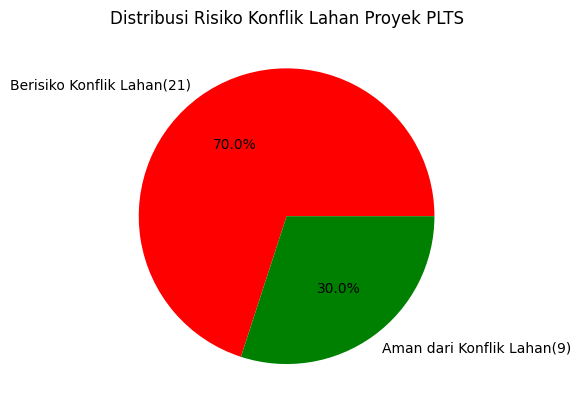

In [ ]:
# import Library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt

# mendefinisikan fungsi analisa risiko untuk mencari tahu proyek PLTS mana saja yang berisiko terjadi konflik lahan
def analisa_risiko(proyek, luas, konflik, standar):
    if luas > standar or konflik == 'ya':
        status = 'berisiko konflik lahan'
        print(f"Proyek {proyek} {status}")
    else:
        status = 'aman dari konflik lahan'
        print(f"Proyek {proyek} {status}")
    return status

# mendefinisikan fungsi untuk membuat pie chart
def pie_plot_konflik(dict):
    berisiko = sum(1 for data in dict.values() if data['status'] =='berisiko konflik lahan')
    tidak_berisiko = len(dict) - berisiko

    labels = [f"Berisiko Konflik Lahan({berisiko})", f"Aman dari Konflik Lahan({tidak_berisiko})"]
    sizes = [berisiko, tidak_berisiko]
    colors = ['red', 'green']

    plt.figure()
    plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%')
    plt.title('Distribusi Risiko Konflik Lahan Proyek PLTS')
    plt.show

# membaca file konflik_lahan.csv
df = pd.read_csv("assets/konflik_lahan.csv")

# menginisiasi variabel yang diperlukan yaitu standar luas 500 ha dan dictionary kosong
standar_luas = 500
risiko_dict = {}

# melakukan iterasi untuk setiap barus di dataframe, kemudian menyimpan ke dictionary
for index, row in df.iterrows():
    proyek = row['Nama_Proyek']
    luas = row['Luas_Lahan']
    konflik = row['Status_Konflik']
    status = analisa_risiko(proyek, luas, konflik, standar_luas)
    risiko_dict[proyek] = {
        'luas' : luas,
        'konflik' : konflik,
        'status' : status
    }

# memanggil fungsi untuk membuat chart
pie_plot_konflik(risiko_dict)